# quant-econ Solutions: On-the-Job Search

Solutions for http://quant-econ.net/jl/jv.html

In [1]:
using QuantEcon
include("jv.jl")
using LaTeXStrings
using Plots
pyplot()

Plots.PyPlotBackend()

## Exercise 1

Here's code to produce the 45 degree diagram

In [2]:
wp = JvWorker(grid_size=25)
G, pi_func, F = wp.G, wp.pi_func, wp.F       # Simplify names

v_init = collect(wp.x_grid) * 0.5
println("Computing value function")
f(x) = bellman_operator(wp, x)
V = compute_fixed_point(f, v_init, max_iter=200)
println("Computing policy functions")
s_policy, phi_policy = bellman_operator(wp, V, ret_policies=true)

# Turn the policy function arrays into CoordInterpGrid objects for interpolation
s = LinInterp(wp.x_grid, s_policy)
phi = LinInterp(wp.x_grid, phi_policy)

h_func(x, b, U) = (1-b) * G(x, phi(x)) + b*max(G(x, phi(x)), U)

Computing value function
Compute iterate 10 with error 0.27832355616098514
Compute iterate 20 with error 0.18485362760592938
Compute iterate 30 with error 0.12277388307811066
Compute iterate 40 with error 0.08154249695446047
Compute iterate 50 with error 0.05415792547131559
Compute iterate 60 with error 0.03596996659293694
Compute iterate 70 with error 0.023890104457239048
Compute iterate 80 with error 0.015867045344705843
Compute iterate 90 with error 0.010538385398092487
Compute iterate 100 with error 0.006999259432742377
Compute iterate 110 with error 0.004648684856004337
Compute iterate 120 with error 0.003087508199701716
Compute iterate 130 with error 0.0020506244622975345
Compute iterate 140 with error 0.0013619593579647926
Compute iterate 150 with error 0.000904569962393964
Compute iterate 160 with error 0.0006007865154593617
Compute iterate 170 with error 0.0003990232399502247
Compute iterate 180 with error 0.00026501850811300187
Compute iterate 190 with error 0.000176016839651

h_func (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



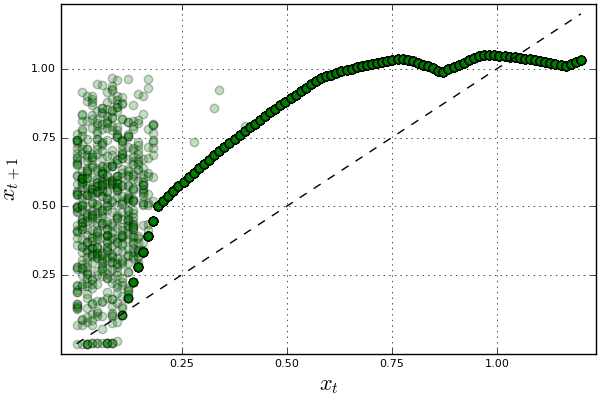

In [3]:
plot_grid_max, plot_grid_size = 1.2, 100
plot_grid = linspace(0, plot_grid_max, plot_grid_size)
ticks = [0.25, 0.5, 0.75, 1.0]

xs = []
ys = []
for x in plot_grid
    for i=1:50
        b = rand() < pi_func(s(x)) ? 1 : 0
        U = rand(wp.F)
        y = h_func(x, b, U)
        push!(xs, x)
        push!(ys, y)
    end
end

scatter(xs, ys, alpha=0.25, color=:green, lims=(0, plot_grid_max), ticks=ticks)
plot!(plot_grid, plot_grid, color=:black, linestyle=:dash, legend=:none)
plot!(xlabel=L"$x_t$", ylabel=L"$x_{t+1}$", guidefont=font(16))

Looking at the dynamics, we can see that 

* If $x_t$ is below about 0.2 the dynamics are random, but $x_{t+1} > x_t$ is very likely
* As $x_t$ increases the dynamics become deterministic, and $x_t$ converges to a steady state value close to 1

Referring back to the figure here

http://quant-econ.net/jl/jv.html#solving-for-policies

we see that $x_t \approx 1$ means that $s_t = s(x_t) \approx 0$ and $\phi_t = \phi(x_t) \approx 0.6$



## Exercise 2

The figure can be produced as follows


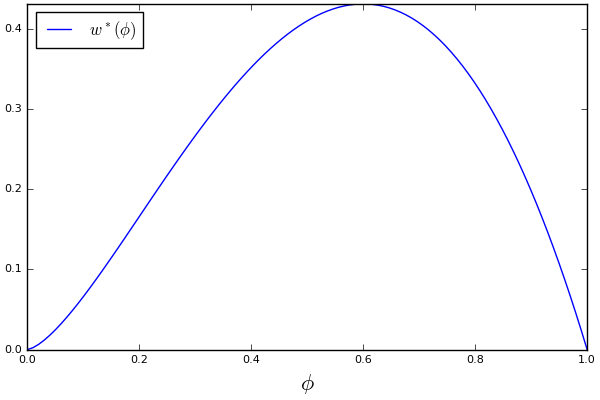

In [4]:
wp = JvWorker(grid_size=25)

xbar(phi) = (wp.A * phi^wp.alpha)^(1.0 / (1.0 - wp.alpha))

phi_grid = linspace(0, 1, 100)

plot(phi_grid, [xbar(phi) * (1 - phi) for phi in phi_grid], color=:blue,
     label=L"$w^*(\phi)$", legendfont=font(12), xlabel=L"$\phi$", 
     guidefont=font(16), grid=false, legend=:topleft)

Observe that the maximizer is around 0.6

This this is similar to the long run value for $\phi$ obtained
in exercise 1

Hence the behaviour of the infinitely patent worker is similar to that of the
worker with $\beta = 0.96$

This seems reasonable, and helps us confirm that our dynamic programming
solutions are probably correct
